In [1]:
import numpy as np
from data_preprocess import load_and_preprocess_data
from visualization import  plot_misclassified_images, plot_random_predictions
from sklearn.metrics import accuracy_score
import numpy as np
from keras.models import load_model

2024-01-02 22:28:37.914597: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-02 22:28:37.937551: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-02 22:28:37.937579: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-02 22:28:37.938293: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-02 22:28:37.943654: I tensorflow/core/platform/cpu_feature_guar

In [2]:
# Load and preprocess data
x_train, y_train, x_test, y_test = load_and_preprocess_data()
# Load model
model = load_model('saved_model/my_model')
# define class name of the dataset
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

2024-01-02 22:28:39.972426: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-02 22:28:39.979969: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-02 22:28:39.980140: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [3]:
# Convert prediction results into category labels
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

2024-01-02 22:28:41.180035: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906


313/313 [==============================] - 1s 3ms/step


Model's accuracy: 74.35%


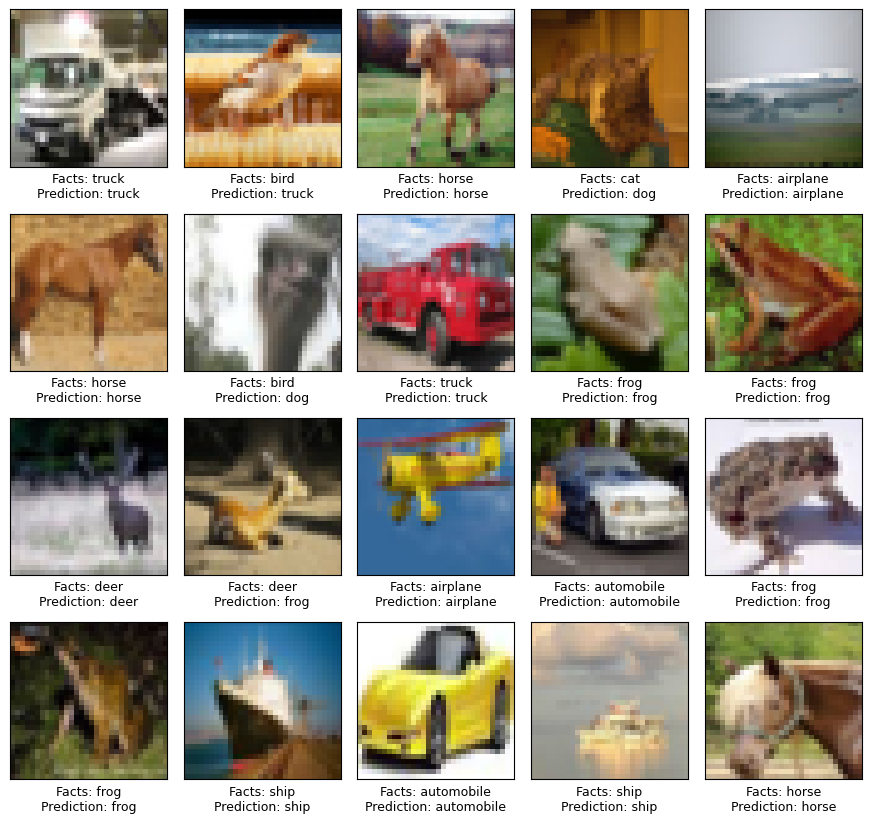

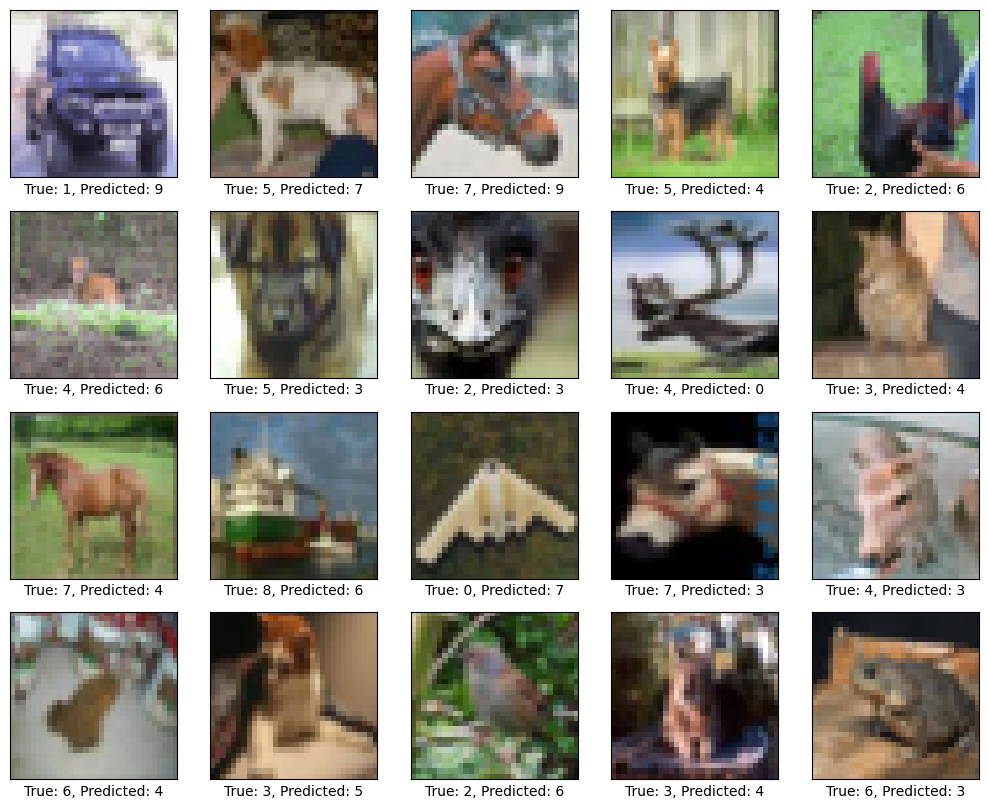

In [4]:
# Calculate the accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Model's accuracy: {accuracy * 100:.2f}%")

plot_random_predictions(x_test, true_classes, predicted_classes, class_names)

# Visualize the inference results
plot_misclassified_images(x_test, true_classes, predicted_classes)